# Gaussian Mixtures
## Unsupervised learning on Digits dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset

In [2]:
from sklearn.datasets import load_digits

⌨ Load the digits dataset

In [3]:
digits = load_digits()

⌨ Show datset `.target` and `.data`

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

⌨ Reshape the first image to `8x8` and use `plt.imshow()` to visualize it

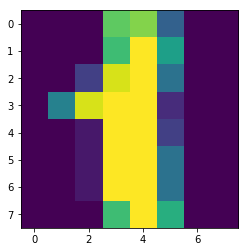

In [8]:
plt.imshow(digits.data[1].reshape((8,8)))

### Training and Testing samples

In [9]:
from sklearn.model_selection import train_test_split

⌨ Generate train and test datasets. Test dataset size: `25%` `random_state=42`.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

### Gaussian Mixture Model

In [11]:
from sklearn.mixture import GaussianMixture

```Python
class sklearn.mixture.GaussianMixture(n_components=1, covariance_type=’full’, ...)
```

⌨ Instantiate a `GaussianMixture` model with `10` components, covariance type `full` and fit it to `X_train`

In [39]:
model_gm = GaussianMixture(n_components=10, covariance_type='full').fit(X_train)

⌨ Compute the adjusted random score on the train dataset

In [40]:
from sklearn.metrics import adjusted_rand_score

```Python
def sklearn.metrics.adjusted_rand_score(labels_true, labels_pred)
```

In [41]:
adjusted_rand_score(y_train, model_gm.predict(X_train))

0.623860010574413

⌨ Compare this score with `k-means`

In [16]:
from sklearn.cluster import KMeans

In [53]:
model_km = KMeans(n_clusters=10).fit(X_train)
adjusted_rand_score(y_train, model_km.predict(X_train))

0.6450533904263636

⌨ __Performance average:__ Fit the models 100 times and compute the mean and variance of the `adjusted_rand_score`.

In [61]:
scores = []
for i in np.arange(100):
    model_gm = GaussianMixture(n_components=10, covariance_type='full').fit(X_train)
    scores.append(adjusted_rand_score(y_train, model_gm.predict(X_train)))
print(np.mean(scores))
print(np.var(scores))

0.6372439479690314
0.002855890606036084


In [55]:
scores = []
for i in np.arange(100):
    model_km = KMeans(n_clusters=10).fit(X_train)
    scores.append(adjusted_rand_score(y_train, model_km.predict(X_train)))
print(np.mean(scores))
print(np.var(scores))

0.6484173221560557
8.059192150580932e-05


In [56]:
scores = []
for i in np.arange(100):
    model_gm = GaussianMixture(n_components=10, covariance_type='tied').fit(X_train)
    scores.append(adjusted_rand_score(y_train, model_gm.predict(X_train)))
print(np.mean(scores))
print(np.var(scores))

0.6637338202414318
0.002753323023796016


⌨ __Confusion matrix:__ Fit the model again with `random_state=10`. Compute the confusion matrix.

In [57]:
from sklearn.metrics import confusion_matrix

```Python
def sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
  '''
  rows: digit label
  columns: cluster
  '''
```

In [58]:
model_gm = GaussianMixture(n_components=10, covariance_type='tied', random_state=10).fit(X_train)

In [59]:
confusion_matrix(y_train, model_gm.predict(X_train))

array([[134,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,  20,   0,   0,   0,  31,   1,  80,   0,  13],
       [  0, 120,   0,   0,   0,  10,   0,   1,   8,   0],
       [  0,   0,   0,   0,   0,   6,   2,   3, 119,   7],
       [  0,   0,   3,   0, 119,   4,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,  98,   0,   0,  24],
       [  1,   0,   0, 133,   0,   1,   0,   1,   0,   0],
       [  0,   0, 135,   0,   0,   3,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0, 100,   0,  32,   0,   2],
       [  0,   0,   1,   0,   0,   8,   1,   0,   2, 120]])

### Prediction examples

[[1.12989464e-06 6.63870585e-14 1.40817748e-06 1.26473231e-11
  3.04333809e-12 2.91240068e-01 2.23341431e-01 2.07755225e-03
  8.21796941e-05 4.83256231e-01]]


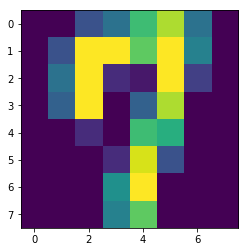

In [60]:
for x in X_test:
    probs = model_gm.predict_proba(x.reshape(1,-1))
    if np.sum(probs**2) < 0.5:
        print(probs)
        plt.imshow(x.reshape(8,8))
        break